In [117]:
import json

Download datasets from https://cs.stanford.edu/people/ranjaykrishna/im2p/index.html

## Paragraphs 

In [118]:
paragraphs_raw = open('dataset/paragraphs_v1.json').read()
paragraphs_raw = json.loads(paragraphs_raw)

In [119]:
# Access paragraph object
json.dumps(paragraphs_raw[0])

'{"url": "https://cs.stanford.edu/people/rak248/VG_100K/2356347.jpg", "image_id": 2356347, "paragraph": "A large building with bars on the windows in front of it. There is people walking in front of the building. There is a street in front of the building with many cars on it. "}'

In [120]:
# Access a specific attribute of a paragraph object
print(paragraphs_raw[0]['image_id'])

2356347


Rearrange the dictionary to have the image id as key for faster retrieval:

In [121]:
paragraphs = {}
for index, paragraph in enumerate(paragraph_raw):
    if paragraph['image_id'] not in paragraphs:
        paragraphs[paragraph['image_id']] = {}
        paragraphs[paragraph['image_id']]['url'] = paragraph['url']
        paragraphs[paragraph['image_id']]['paragraph'] = paragraph['paragraph']
        paragraphs[paragraph['image_id']]['original_index'] = index

In [122]:
print(paragraphs[2356347])

{'url': 'https://cs.stanford.edu/people/rak248/VG_100K/2356347.jpg', 'paragraph': 'A large building with bars on the windows in front of it. There is people walking in front of the building. There is a street in front of the building with many cars on it. ', 'original_index': 0}


In [123]:
# List all the image_id
print(sorted(paragraphs.keys()))

[59, 63, 80, 84, 99, 108, 121, 131, 137, 139, 141, 175, 177, 179, 185, 186, 194, 195, 199, 201, 221, 232, 239, 250, 258, 262, 274, 284, 291, 294, 302, 304, 308, 313, 326, 335, 358, 362, 364, 380, 387, 388, 402, 405, 411, 418, 419, 421, 428, 429, 442, 471, 478, 491, 494, 497, 509, 512, 517, 523, 538, 543, 552, 558, 559, 564, 565, 587, 600, 608, 612, 630, 644, 652, 656, 664, 665, 677, 685, 695, 698, 699, 707, 712, 713, 724, 727, 737, 740, 750, 764, 782, 789, 813, 815, 817, 836, 838, 853, 877, 879, 891, 896, 900, 904, 909, 918, 924, 947, 951, 982, 985, 991, 1001, 1025, 1060, 1067, 1068, 1081, 1082, 1090, 1122, 1129, 1143, 1159, 1168, 1170, 1186, 1222, 1231, 1242, 1243, 1256, 1274, 1291, 1321, 1326, 1338, 1348, 1401, 1466, 1472, 1473, 1505, 1512, 1530, 1547, 1582, 1589, 1610, 1636, 1659, 1665, 1677, 1701, 1788, 1857, 1890, 1947, 1979, 1981, 2037, 2073, 2133, 2157, 2226, 2234, 2263, 2275, 2292, 2319, 2348, 2363, 2396, 2472, 2504, 2522, 2525, 2564, 2631, 2668, 2688, 2748, 2781, 2828, 2855, 2

In [124]:
# List number of image_id
print(len(paragraphs.keys()))

19551


In [125]:
# Given an image id
# Return the number of sentences in the paragraph and the different sentences in the paragraph
def split_paragraph(image_id):
    paragraph = paragraphs[image_id]['paragraph']
    sentence = paragraph.split('. ')
    if '' in sentence:
        sentence.remove('')
    return len(sentence), sentence

In [126]:
print(split_paragraph(2356347))

(3, ['A large building with bars on the windows in front of it', 'There is people walking in front of the building', 'There is a street in front of the building with many cars on it'])


## Accessing Images via VG Server 

Install and use Visual Genome Python Driver from https://github.com/ranjaykrishna/visual_genome_python_driver. Both the Visual Genome Python Driver and the Visual Genome tutorial (at https://visualgenome.org/api/v0/api_beginners_tutorial.html) codes are broken, so I had to slightly modify those locally to make it working.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from visual_genome import api
from visual_genome import local
from PIL import Image as PIL_Image
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

### Get All Visual Genome Image ids

In [4]:
ids = api.get_all_image_ids()
print(ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [9]:
print(len(ids))

108077


### Get A Range of Visual Genome Image ids

In [5]:
ids = api.get_image_ids_in_range(start_index=2000, end_index=2010)
image_id = ids[0]
print(ids)

%matplotlib inline

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


### Get Image Data

In [26]:
img = api.get_image_data(id=61512)
print(img)

id: 61512, coco_id: 248774, flickr_id: 6273011878, width: 1024, url: https://cs.stanford.edu/people/rak248/VG_100K/61512.jpg


### Get Region Descriptions for an Image

In [28]:
regions = api.get_region_descriptions_of_image(id=61512)
print(regions[0])

id: 1, x: 511, y: 241, width: 206,height: 320, phrase: A brown, sleek horse with a bridle, image: 61512


### Get Region Graph of a Region

In [29]:
# Region Description: 'Gray elephants walking in line'.
graph = api.get_region_graph_of_region(image_id=61512, region_id=1)

In [30]:
print("OBJECTS")
print(graph.objects)

print("ATTRIBUTES")
print(graph.attributes)

print("RELATIONSHIPS")
print(graph.relationships)

OBJECTS
[horse]
ATTRIBUTES
[3015675: horse is brown]
RELATIONSHIPS
[]


### Get Scene Graph of an Image

In [31]:
# Region Description: 'Gray elephants walking in line'.
graph = api.get_scene_graph_of_image(id=61512)

In [32]:
print("OBJECTS")
print(graph.objects)

print("ATTRIBUTES")
print(graph.attributes)

print("RELATIONSHIPS")
print(graph.relationships)

OBJECTS
[horse, grass, horse, bridle, truck, sign, gate, truck, tire, trough, window, door, building, halter, mane, mane, leaves, fence]
ATTRIBUTES
[3015675: horse is brown, 3015676: horse is spotted, 3015677: horse is red, 3015678: horse is dark brown, 3015679: truck is red, 3015680: horse is brown, 3015681: truck is red, 3015682: sign is blue, 3015683: gate is red, 3015684: truck is white, 3015685: tire is blue, 3015686: gate is wooden, 3015687: horse is standing, 3015688: truck is red, 3420018: horse is brown, 3420019: horse is white, 3015690: building is tan, 3015691: halter is red, 3015692: horse is brown, 3015693: gate is wooden, 3015694: grass is grassy, 3015695: truck is red, 3015696: gate is orange, 3015697: halter is red, 3015698: tire is blue, 3015699: truck is white, 3015700: trough is white, 3420016: horse is brown, 3420017: horse is cream, 3015702: leaves is green, 3015703: grass is lush, 3015704: horse is enclosed, 3420022: horse is brown, 3420023: horse is white, 301570

In [104]:
import json

qa_raw = open('dataset/question_answers.json').read()
qa_raw = json.loads(qa_raw)
print(qa_raw[0])

{'id': 1, 'qas': [{'a_objects': [], 'question': 'What color is the clock?', 'image_id': 1, 'qa_id': 986768, 'answer': 'Green.', 'q_objects': []}, {'a_objects': [], 'question': 'How many people are there?', 'image_id': 1, 'qa_id': 986769, 'answer': 'Two.', 'q_objects': []}, {'a_objects': [], 'question': "What color is the man's shirt?", 'image_id': 1, 'qa_id': 986772, 'answer': 'Red.', 'q_objects': []}, {'a_objects': [], 'question': 'What are the men doing?', 'image_id': 1, 'qa_id': 986777, 'answer': 'Interacting.', 'q_objects': []}, {'a_objects': [], 'question': 'Where is the white work truck?', 'image_id': 1, 'qa_id': 986780, 'answer': 'Parked on the street.', 'q_objects': []}, {'a_objects': [], 'question': 'What is the guy wearing?', 'image_id': 1, 'qa_id': 986781, 'answer': 'A red shirt.', 'q_objects': []}, {'a_objects': [], 'question': 'Where is the black sign?', 'image_id': 1, 'qa_id': 986782, 'answer': 'On the front of the building.', 'q_objects': []}, {'a_objects': [], 'question

### Visualize A Region

In [86]:
import io

def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(io.BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

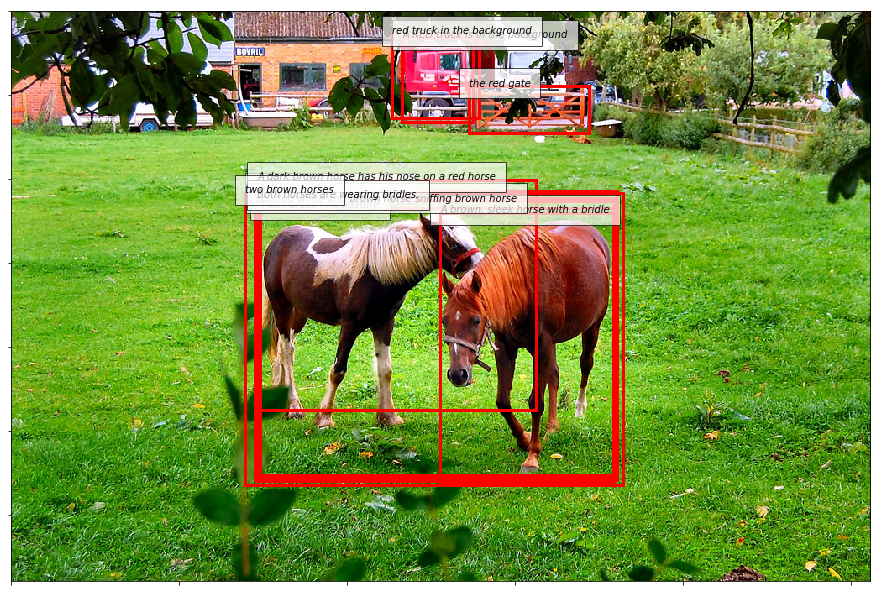

In [94]:
image = vg.get_image_data(id=61512)
regions = vg.get_region_descriptions_of_image(id=61512)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
visualize_regions(image, regions[:10])

## Accessing Images Locally

### Get All Image Data

In [55]:
image_data = local.get_all_image_data("dataset")
print(image_data[5110])

id: 61512, coco_id: 248774, flickr_id: 6273011878, width: 1024, url: https://cs.stanford.edu/people/rak248/VG_100K/61512.jpg


### Get All Region Descriptions

In [56]:
region_descriptions = local.get_all_region_descriptions("dataset")
print(region_descriptions[5110])

[id: 1, x: 511, y: 241, width: 206,height: 320, phrase: A brown, sleek horse with a bridle, image: 61512, id: 6, x: 291, y: 214, width: 431,height: 345, phrase: two horses stand on the grass, image: 61512, id: 11, x: 297, y: 235, width: 424,height: 321, phrase: Two horses in a pasture, image: 61512, id: 16, x: 292, y: 227, width: 430,height: 326, phrase: spotted white and brown horse sniffing brown horse, image: 61512, id: 21, x: 293, y: 201, width: 332,height: 275, phrase: A dark brown horse has his nose on a red horse, image: 61512, id: 982, x: 293, y: 223, width: 425,height: 337, phrase: Both horses are wearing bridles., image: 61512, id: 1182, x: 466, y: 32, width: 84,height: 100, phrase: A RED truck is in the background, image: 61512, id: 8182, x: 279, y: 217, width: 450,height: 348, phrase: two brown horses, image: 61512, id: 8183, x: 454, y: 27, width: 103,height: 100, phrase: red truck in the background, image: 61512, id: 8185, x: 545, y: 90, width: 143,height: 55, phrase: the 

### Get All QAs

In [57]:
qas = local.get_all_qas("dataset")
print(qas[5110])

[id: 991154, image: 61512, question: What color is the keyboard?, answer: Black., id: 991155, image: 61512, question: What is the window treatment?, answer: White blinds., id: 991157, image: 61512, question: What color is the front folder?, answer: Yellow., id: 991158, image: 61512, question: How many horse are there?, answer: Two., id: 991159, image: 61512, question: What color truck is in the back?, answer: Red., id: 991160, image: 61512, question: What vehicle is in the back?, answer: The truck., id: 991161, image: 61512, question: What color are the horse?, answer: Brown., id: 991162, image: 61512, question: Where are there horses standing?, answer: Next to each other., id: 991163, image: 61512, question: What is all over the grass?, answer: Leaves., id: 991164, image: 61512, question: What color is the building sign?, answer: Blue., id: 991166, image: 61512, question: What is green on the ground?, answer: The grass., id: 991167, image: 61512, question: What color is the horse on t